In [24]:
import pandas as pd
import numpy as np
# import get_prices as hist
import tensorflow as tf
from preprocessing import DataProcessing
# import pandas_datareader.data as pdr
# import fix_yahoo_finance as fix
import matplotlib.pyplot as plt
# fix.pdr_override()

In [37]:
def my_plot(history, head, save, model_name):
    loss = history.history['loss'][head:]
    val_loss = history.history['val_loss'][head:]
    epochs = range(head + 1, len(loss) + head + 1)
    plt.plot(epochs, loss, color='orange', label='Train')
    plt.plot(epochs, val_loss, color='green', label='Validation')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    if save:
#         plt.savefig("figures/" + model_name + ".{}head".format(head) + ".png", dpi=250)
        pass

In [38]:
model_base_name = "{}.{}ep.{}lr"

In [39]:
start = "2013-06-30"
end = "2019-07-29"

# hist.get_stock_data("AAPL", start_date=start, end_date=end)
process = DataProcessing("bitcoin_processed.csv", 1.0)
# process.gen_test(10)
process.gen_train(10)

In [40]:
XY_total = [(process.X_train[i], process.Y_train[i]) for i in range(len(process.X_train))]
np.random.shuffle(XY_total)

In [41]:
i_split = int(0.9 * len(XY_total))
XY_train = XY_total[:i_split]
X_train = np.asarray([t[0] for t in XY_train])
X_train = X_train.reshape((len(X_train), 10, 1)) / 200
Y_train = np.asarray([t[1] for t in XY_train]) / 200

XY_val = XY_total[i_split:]
X_val = np.asarray([t[0] for t in XY_val])
X_val = X_val.reshape((len(X_val), 10, 1)) / 200
Y_val = np.asarray([t[1] for t in XY_val]) / 200

# Models

In [42]:
from tensorflow.keras.layers import Convolution1D, LSTM, Dropout, Dense, MaxPooling1D, Flatten

## CNN model

In [43]:
epochs = 50
lr = ""
d_rate = 0.4
n_filters = 64
kernel_size = 2

In [44]:
model_name = model_base_name.format(
    "CNN",
    epochs,
    lr
)

In [45]:
model = tf.keras.Sequential()
# model.add(Dense(128, activation='relu',input_shape=(10, 1)))
model.add(Convolution1D(input_shape=(10, 1),
                        filters=n_filters, 
                        kernel_size=kernel_size,
                        activation='relu', 
#                         padding='valid', 
#                         strides=1
                       )
         )
model.add(MaxPooling1D(pool_size=1))
# model.add(tf.keras.layers.Convolution1D(20))
model.add(Dropout(d_rate))
model.add(Flatten())
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))
model.compile(optimizer="adam", loss="mean_squared_error")

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 9, 64)             192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 577       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val))

Train on 1988 samples, validate on 221 samples
Epoch 1/50
1988/1988 [==============================] - 0s 206us/sample - loss: 99.7904 - val_loss: 6.4095
Epoch 2/50
1988/1988 [==============================] - 0s 48us/sample - loss: 16.8338 - val_loss: 6.5175
Epoch 3/50
1988/1988 [==============================] - 0s 46us/sample - loss: 16.1503 - val_loss: 5.8957
Epoch 4/50
1988/1988 [==============================] - 0s 43us/sample - loss: 15.9743 - val_loss: 5.7765
Epoch 5/50
1988/1988 [==============================] - 0s 43us/sample - loss: 12.3526 - val_loss: 9.0566
Epoch 6/50
1988/1988 [==============================] - 0s 43us/sample - loss: 12.8654 - val_loss: 6.8119
Epoch 7/50
1988/1988 [==============================] - 0s 44us/sample - loss: 12.3703 - val_loss: 5.7308
Epoch 8/50
1988/1988 [==============================] - 0s 49us/sample - loss: 10.1358 - val_loss: 5.3923
Epoch 9/50
1988/1988 [==============================] - 0s 46us/sample - loss: 9.5376 - val_loss: 4.9920

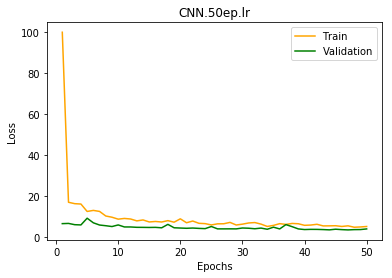

In [49]:
my_plot(history, 0, True, model_name)

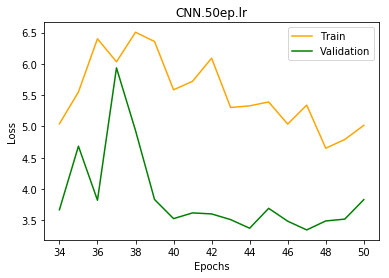

In [50]:
my_plot(history, 33, True, model_name)

## LSTM model

In [87]:
epochs = 50
lr = 0.00001

In [88]:
adam = tf.keras.optimizers.Adam(lr=lr)

In [89]:
model_name = model_base_name.format(
    "LSTM",
    epochs,
    lr
)

In [90]:
model = tf.keras.Sequential()
model.add(LSTM(20, input_shape=(10, 1), return_sequences=True))
model.add(LSTM(20))
model.add(Dense(1, activation=tf.nn.relu))

model.compile(optimizer=adam, loss="mean_squared_error")

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 20)            1760      
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val))

Train on 1988 samples, validate on 221 samples
Epoch 1/50
1988/1988 [==============================] - 3s 2ms/sample - loss: 487.7348 - val_loss: 569.1099
Epoch 2/50
1988/1988 [==============================] - 1s 462us/sample - loss: 486.6329 - val_loss: 567.9508
Epoch 3/50
1988/1988 [==============================] - 1s 464us/sample - loss: 485.5626 - val_loss: 566.7966
Epoch 4/50
1988/1988 [==============================] - 1s 449us/sample - loss: 484.4920 - val_loss: 565.6602
Epoch 5/50
1988/1988 [==============================] - 1s 474us/sample - loss: 483.4375 - val_loss: 564.5207
Epoch 6/50
1988/1988 [==============================] - 1s 456us/sample - loss: 482.3692 - val_loss: 563.3690
Epoch 7/50
1988/1988 [==============================] - 1s 452us/sample - loss: 481.3060 - val_loss: 562.2217
Epoch 8/50
1988/1988 [==============================] - 1s 459us/sample - loss: 480.2266 - val_loss: 561.0568
Epoch 9/50
1988/1988 [==============================] - 1s 443us/sample - l

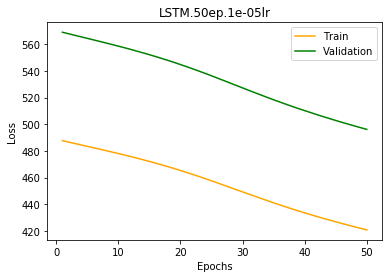

In [93]:
my_plot(history, 0, True, model_name)

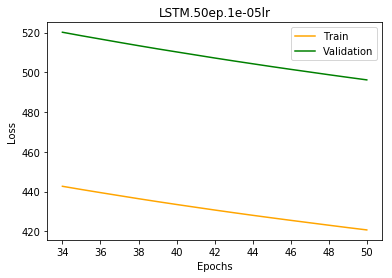

In [94]:
my_plot(history, 33, True, model_name)

## CNN + LSTM model

In [73]:
epochs = 35
lr = 0.00001

In [74]:
# adam = tf.keras.optimizers.Adam(lr=lr)
adam = tf.keras.optimizers.Adam()

In [75]:
model_name = model_base_name.format(
    "CNN + LSTM",
    epochs,
    lr
)

In [76]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(10, 1), activation=tf.nn.relu))
model.add(Convolution1D(filters=24, 
                        kernel_size=1,
                        activation='relu'
                       )
         )
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(
                        input_shape=(10, 1),
                        filters=48, 
                        kernel_size=1,
                        activation='relu'
                       )
         )
model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.4))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.relu))

model.compile(optimizer=adam, loss="mean_squared_error")

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10, 128)           256       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 24)            3096      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 24)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 5, 48)             1200      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 48)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 2, 40)             14240     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                9344      
__________

In [78]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=128, validation_data=(X_val, Y_val))

Train on 1988 samples, validate on 221 samples
Epoch 1/35
1988/1988 [==============================] - 2s 1ms/sample - loss: 482.9480 - val_loss: 550.6504
Epoch 2/35
1988/1988 [==============================] - 0s 68us/sample - loss: 451.0591 - val_loss: 495.8484
Epoch 3/35
1988/1988 [==============================] - 0s 65us/sample - loss: 387.5477 - val_loss: 414.5082
Epoch 4/35
1988/1988 [==============================] - 0s 64us/sample - loss: 315.8342 - val_loss: 339.6043
Epoch 5/35
1988/1988 [==============================] - 0s 69us/sample - loss: 256.5578 - val_loss: 281.4563
Epoch 6/35
1988/1988 [==============================] - 0s 65us/sample - loss: 208.3421 - val_loss: 229.2595
Epoch 7/35
1988/1988 [==============================] - 0s 65us/sample - loss: 165.4393 - val_loss: 184.2871
Epoch 8/35
1988/1988 [==============================] - 0s 69us/sample - loss: 131.4989 - val_loss: 147.2268
Epoch 9/35
1988/1988 [==============================] - 0s 65us/sample - loss: 103

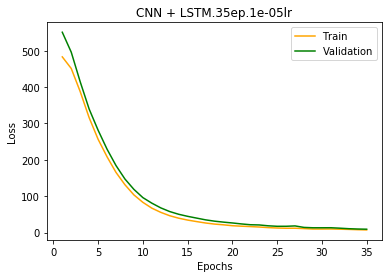

In [79]:
my_plot(history, 0, True, model_name)

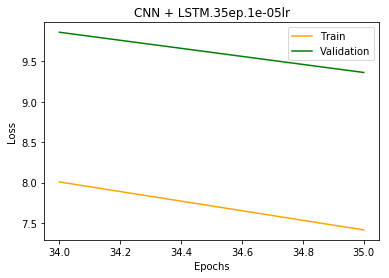

In [81]:
my_plot(history, 33, True, model_name)

# Prediction

test_csv = "stock_prices_test.csv"
def save_stock_data(ticker, start_date, end_date):
    i = 1
    try:
        all_data = pdr.get_data_yahoo(ticker, start_date, end_date)
    except ValueError:
        print("ValueError, trying again")
        i += 1
        if i < 5:
            time.sleep(10)
            get_stock_data(ticker, start_date, end_date)
        else:
            print("Tried 5 times, Yahoo error. Trying after 2 minutes")
            time.sleep(120)
            get_stock_data(ticker, start_date, end_date)
    stock_data = all_data["Adj Close"]
    stock_data.to_csv(test_csv)

In [95]:
def my_pred_plot(pred, test, save):
    samples = range(1, len(test) + 1)
    plt.plot(samples, pred, color='orange', label='Prediction')
    plt.plot(samples, test, color='green', label='Actual value')
    plt.title(model_name)
    plt.xlabel('Samples')
    plt.ylabel('Stock value')
    plt.legend()
    if save:
#         plt.savefig("figures/" + model_name + ".pred" + ".png", dpi=250)
        pass

In [96]:
# save_stock_data("AAPL", "2016-03-01", "2016-09-30")
process_test = DataProcessing("bitcoin_test1.csv", 1.0)
process_test.gen_train(10)
X_test = process_test.X_train.reshape((len(process_test.X_train), 10, 1)) / 200
Y_test = process_test.Y_train

In [97]:
Y_predict = model.predict(X_test)*200

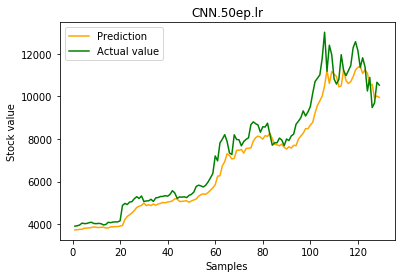

In [56]:
# CNN
my_pred_plot(Y_predict[0:], Y_test[0:], False)

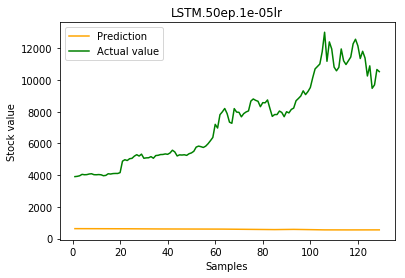

In [98]:
# LSTM
my_pred_plot(Y_predict[0:], Y_test[0:], False)

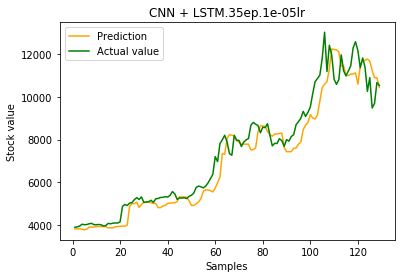

In [86]:
# CNN + LSTM 
my_pred_plot(Y_predict[0:], Y_test[0:], False)